### Racing Game Analysis

What follows will be an analysis of peformance, training, and various other metrics with regards to the racing game environment.

Note that the models we will be speaking of have already been trained.

In [1]:
import sys, os
print(os.getcwd())

c:\Users\karat\Documents\topics_in_cs1\DRL-Assignment\notebooks


In [2]:
# Importing relevant libraries
import sys, os
import matplotlib.pyplot as plt

racing_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "envs", "racing_game"))
target_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "envs", "target_game"))
sys.path.append(racing_dir)
from racing_env import RacingEnv
sys.path.append(target_dir)
from target_env import TargetEnv

train_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.append(train_dir)
from test_models import SACTester, PPOTester, DDPGTester, A2CTester

c:\Users\karat\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


[2025-10-26 20:26:11] MultiLogger Initialized


In [3]:
# Creating needed objects
renv = RacingEnv()
s = SACTester('pretrained_SAC_racing.pt', renv)
p = PPOTester('pretrained_PPO_racing.pt', renv)
d = DDPGTester('pretrained_DDPG_racing.pt', renv)
a = A2CTester('pretrained_A2C_racing.pt', renv)

Unfortunately, a jupyter notebook doesn't seem to be able to actually render pygame. We'll settle for collecting data on how the agents play, and you can observe them playing elsewhere. Note that this script takes an absolutely ungodly amount of time to run because jupyter notebooks suck, so we're sticking to ten episodes and noting that this means data may be subject to more noise.

In [4]:
ppo_res = p.test(n_episodes=10, visual=False)
sac_res = s.test(n_episodes=10, visual=False)
ddpg_res = d.test(n_episodes=10, visual=False)
a2c_res = a.test(n_episodes=10, visual=False)

In [5]:
#print(ppo_res)

In [6]:
episode_infos = ppo_res[1]

# Find the maximum number of steps among all episodes
max_steps = max(len(ep) for ep in episode_infos)

mean_positions = []
for step_idx in range(max_steps):
    sum_pos = [0.0, 0.0]
    count = 0

    for ep in episode_infos:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                position = stepinfo['car_position']
                sum_pos[0] += position[0]
                sum_pos[1] += position[1]
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_positions.append([sum_pos[0] / count, sum_pos[1] / count])
    else:
        mean_positions.append([None, None])  # or skip, depending on your needs

# print(mean_positions)

In [7]:
episode_infos = sac_res[1]

# Find the maximum number of steps among all episodes
max_steps = max(len(ep) for ep in episode_infos)

mean_positions2 = []
for step_idx in range(max_steps):
    sum_pos = [0.0, 0.0]
    count = 0

    for ep in episode_infos:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                position = stepinfo['car_position']
                sum_pos[0] += position[0]
                sum_pos[1] += position[1]
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_positions2.append([sum_pos[0] / count, sum_pos[1] / count])
    else:
        mean_positions2.append([None, None])  # or skip, depending on your needs

#print(mean_positions2)


In [8]:
episode_infos = ddpg_res[1]

# Find the maximum number of steps among all episodes
max_steps = max(len(ep) for ep in episode_infos)

mean_positions3 = []
for step_idx in range(max_steps):
    sum_pos = [0.0, 0.0]
    count = 0

    for ep in episode_infos:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                position = stepinfo['car_position']
                sum_pos[0] += position[0]
                sum_pos[1] += position[1]
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_positions3.append([sum_pos[0] / count, sum_pos[1] / count])
    else:
        mean_positions3.append([None, None])  # or skip, depending on your needs

#print(mean_positions2)

In [9]:
episode_infos = a2c_res[1]

# Find the maximum number of steps among all episodes
max_steps = max(len(ep) for ep in episode_infos)

mean_positions4 = []
for step_idx in range(max_steps):
    sum_pos = [0.0, 0.0]
    count = 0

    for ep in episode_infos:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                position = stepinfo['car_position']
                sum_pos[0] += position[0]
                sum_pos[1] += position[1]
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_positions4.append([sum_pos[0] / count, sum_pos[1] / count])
    else:
        mean_positions4.append([None, None])  # or skip, depending on your needs

#print(mean_positions2)

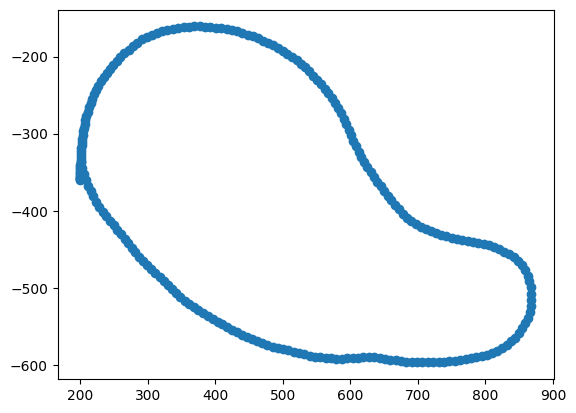

In [10]:
x = [point[0] for point in mean_positions]
y = [-point[1] for point in mean_positions] # because of how pygame handles position
plt.scatter(x, y)
plt.show()

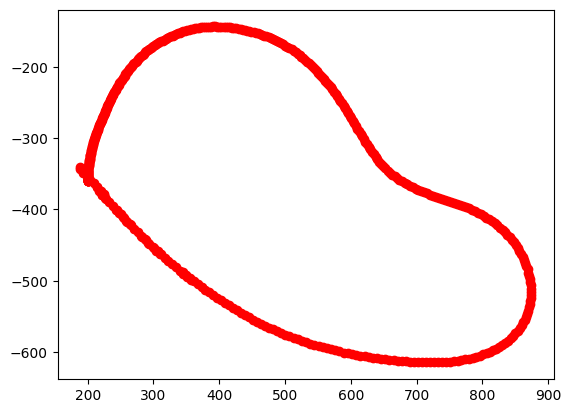

In [11]:
x2 = [point[0] for point in mean_positions2]
y2 = [-point[1] for point in mean_positions2]
plt.scatter(x2, y2, color='red')
plt.show()

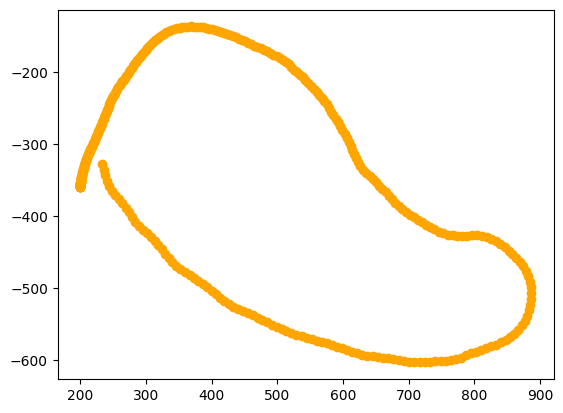

In [12]:
x3 = [point[0] for point in mean_positions3]
y3 = [-point[1] for point in mean_positions3]
plt.scatter(x3, y3, color='orange')
plt.show()

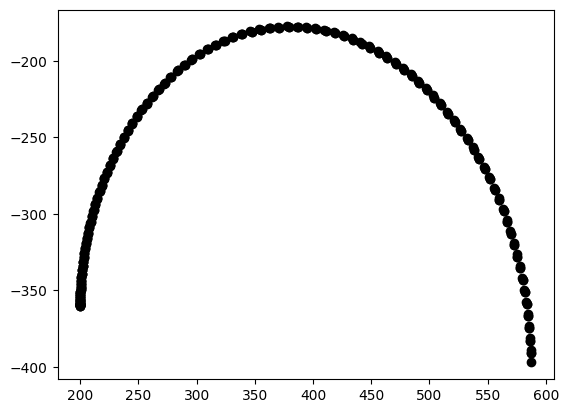

In [13]:
x4 = [point[0] for point in mean_positions4]
y4 = [-point[1] for point in mean_positions4]
plt.scatter(x4, y4, color='black')
plt.show()

And this is about what should be expected if you have watched the four algorithms play. The PPO, SAC, and DDPG pretrained models are all very smooth, though there are some slight efficiency differentials if you look at the average episode lengths. The A2C one just straight up sucks.

In [14]:
ep_inf_p = ppo_res[1]
ep_inf_s = sac_res[1]
ep_inf_d = ddpg_res[1]
ep_inf_a = a2c_res[1]

avg_len_p  = 0.0
avg_len_s = 0.0
avg_len_d = 0.0
avg_len_a = 0.0

for episode in ep_inf_p:
    avg_len_p += len(episode)
avg_len_p /= len(ep_inf_p)

for episode in ep_inf_s:
    avg_len_s += len(episode)
avg_len_s /= len(ep_inf_s)

for episode in ep_inf_d:
    avg_len_d += len(episode)
avg_len_d /= len(ep_inf_d)

for episode in ep_inf_a:
    avg_len_a += len(episode)
avg_len_a /= len(ep_inf_a)

print(f"Average length of PPO episode: {avg_len_p:.2f} | Average length of SAC episode: {avg_len_s:.2f}\n"
      f"Average length of DDPG episode: {avg_len_d:.2f} | Average length of A2C episode: {avg_len_a:.2f}")

Average length of PPO episode: 239.00 | Average length of SAC episode: 469.00
Average length of DDPG episode: 341.00 | Average length of A2C episode: 319.00


To be perfectly honest, this one surprised me. I was aware that the SAC trained race car accelerates oddly (an artifact of the way the warmup policy runs, since I didn't want to make it too good and get docked marks for a scripted policy) but I thought the disgusting behaviour of the PPO car would outweigh that. Turns out though, I'm seeing the PPO car about 200 steps faster. The DDPG also surprised me. It's a very unstable algorithm but when it produces a functional model, it produces a darn good one. A2C notice takes forever and still dies.

In [15]:
ep_inf_p = ppo_res[1]
ep_inf_s = sac_res[1]
ep_inf_d = ddpg_res[1]
ep_inf_a = a2c_res[1]

crashes_p  = 0
crashes_s = 0
crashes_d = 0
crashes_a = 0

for episode in ep_inf_p:
    for step in episode:
        crashes_p += step['off_track']
for episode in ep_inf_s:
    for step in episode:
        crashes_s += step['off_track']
for episode in ep_inf_d:
    for step in episode:
        crashes_d += step['off_track']
for episode in ep_inf_a:
    for step in episode:
        crashes_a += step['off_track']
print(f"Total crashes over PPO episodes: {crashes_p:.2f} | Total crashes over SAC episodes: {crashes_s:.2f}\n"
      f"Total crashes over DDPG episodes: {crashes_d:.2f} | Total crashes over A2C episodes: {crashes_a:.2f}")

Total crashes over PPO episodes: 0.00 | Total crashes over SAC episodes: 0.00
Total crashes over DDPG episodes: 0.00 | Total crashes over A2C episodes: 30.00


Again, I am surprised by the results. All reruns of this notebook I have tried have PPO episode crashes at zero, though I have seen up to two on previous models I've imported. This means no episode could have terminated because of crashes (3 needed to terminate). Turns out the correct way to drive in these physics is like a lunatic, as long as you don't happen to crash.

In [16]:
ep_inf_p = ppo_res[1]
ep_inf_s = sac_res[1]
ep_inf_d = ddpg_res[1]
ep_inf_a = a2c_res[1]

# Find the maximum number of steps among all episodes
max_steps_p = max(len(ep) for ep in ep_inf_p)
max_steps_s = max(len(ep) for ep in ep_inf_s)
max_steps_d = max(len(ep) for ep in ep_inf_d)
max_steps_a = max(len(ep) for ep in ep_inf_a)

mean_speeds = []
for step_idx in range(max_steps_p):
    sum_speed = 0.0
    count = 0

    for ep in ep_inf_p:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                speed = stepinfo['car_speed']
                sum_speed += speed
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_speeds.append(sum_speed / count)
    else:
        mean_speeds.append(None)

mean_speeds2 = []
for step_idx in range(max_steps_s):
    sum_speed = 0.0
    count = 0

    for ep in ep_inf_s:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                speed = stepinfo['car_speed']
                sum_speed += speed
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_speeds2.append(sum_speed / count)
    else:
        mean_speeds2.append(None)

mean_speeds3 = []
for step_idx in range(max_steps_d):
    sum_speed = 0.0
    count = 0

    for ep in ep_inf_d:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                speed = stepinfo['car_speed']
                sum_speed += speed
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_speeds3.append(sum_speed / count)
    else:
        mean_speeds3.append(None)

mean_speeds4 = []
for step_idx in range(max_steps_a):
    sum_speed = 0.0
    count = 0

    for ep in ep_inf_a:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                speed = stepinfo['car_speed']
                sum_speed += speed
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_speeds4.append(sum_speed / count)
    else:
        mean_speeds4.append(None)
#print(mean_speeds)

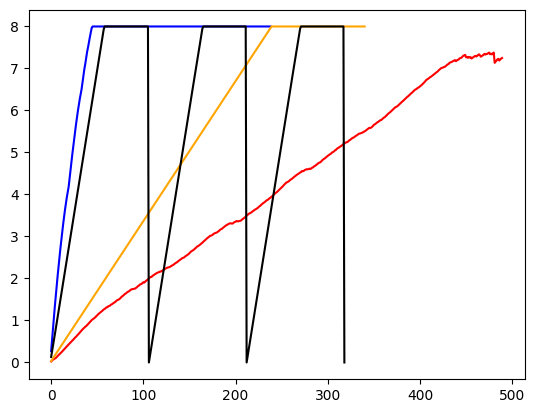

In [17]:
plt.plot(mean_speeds, color='blue')
plt.plot(mean_speeds2, color='red')
plt.plot(mean_speeds3, color='orange')
plt.plot(mean_speeds4, color='black')
plt.show()

This graph is a little interesting, in just how drastically it varies. The PPO model has noticeable differences and downspikes in it's speed value, whereas the SAC and DDPG trained models smoothly accelerate toward the maximum, and only barely reach it at the end. The PPO model does finish faster on average, and so the graph doesn't reach all the way. In fact, the average PPO episode ends about 200 timesteps faster, so on some level the small variation past the average length can be attributed to noise. Notice again how drastically longer SAC episodes take to finish.

We could probably assume that the A2C models happened to crash around the wild downspikes, which would necessarily reset the speed to zero.

So, final conclusions. They all perform fairly well, though the PPO model appears to actually do a far better job of exploiting the system. In some iterations, I have found that it crashes deliberately right at the end of the track so that it can collect progress and checkpoint bonuses over again... I think I have tuned this out, but if you retrain models you may see it. I did leave the possibility for this in the environment code, mostly because I think it's funny to watch them slam into walls. It also makes balancing the reward function more meaningful, because they should really have an opportunity to gain points after a crash, while still preferring to never crash. The biggest issue with the reward function was exactly that, though there also had to be adjustments made to give the agent three chances, as originally a single crash terminated the episode. They trained much better when mistakes were not so harshly punished.

As it really turned out in the end, training time was the most important factor for their skill, and reward function was secondary (though obviously still critical). The longer I have attempted training these models after finalizing the reward function, the more I have seen that. The episode lengths in the README represent the lowest episode counts that I have seen consistent good results with, and are what the pretrained models are based on.